# Vehicle Collision Dataset Analysis: Seattle Department of Transportation (SDOT)

According to the annual United States road crash statistics by ASIRT, more than 38,000 people die every year in crashes on U.S. roadways. The U.S. traffic fatality rate is 12.4 deaths per 100,000 inhabitants. It is evident that with the increasing number of vehicles on urban and suburban roads, the cases of vehicle accidents are also increasing. This project aims to analyse vehicle collision data available in public domain provided by Seattle Geo Data (SDOT) and derive some useful insights. <br>
Data provided by the Seattle Department of Transportation (SDOT) on vehicle collisions along with its severity might be useful to derive insights and may show some pattern with the environmental factors like weather, road conditions etc. <br>
The dataset consists of 40 columns having different kinds of data like, collision severity, road conditions, number of people involved, location of collision, weather etc. Meta-data of the dataset can be viewed https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf

## Important Insights

<b>
    1. 62% of accidents belong to category "Property Damage Only Collision" while 26% belong to category "Injury Collision" <br>
    2. 50% of accidents tend to happen between 12:00 P.M. to 8:00 P.M.<br>
    3. Between 00:00 to 04:00, cases of severity 1 ("Property damage only collision") incidents are higher than rest of the day percentage wise<br>
    4. 11% of all cases in late night are due to speeding <br>
    5. ~18% of collisions happening in morning and early morning are due to inattention of drivers <br>
</b>

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap, HeatMapWithTime, MarkerCluster
from pandas_profiling import ProfileReport
import plotly.express as px
import pprint
import plotly.graph_objs as go
import matplotlib as mpl

In [2]:
# profile = ProfileReport(df)
# profile.to_file("your_report.html")

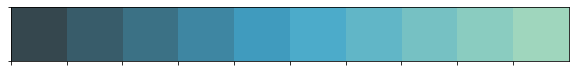

In [3]:
sns.palplot(sns.color_palette("GnBu_d",10))
sns.set_palette(sns.color_palette("GnBu_d",10))

In [4]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

#### Reading the Data

In [5]:
df = pd.read_csv("Collisions.csv", low_memory=False, parse_dates=["INCDATE"])
df_original = df.copy()
df.head()

X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO     STATUS  \
0 -122.392900  47.648646  1         332176  333676     EA40602  Matched     
1 -122.284487  47.603308  2         328504  330004     EA10294  Unmatched   
2 -122.338480  47.619118  3         329091  330591     EA15604  Matched     
3 -122.358307  47.653110  4         328274  329774     EA07215  Matched     
4 -122.296519  47.733786  5         329003  330503     E986969  Matched     

       ADDRTYPE   INTKEY  \
0  Intersection  26581.0   
1  Block        NaN        
2  Block        NaN        
3  Block        NaN        
4  Intersection  35990.0   

                                                   LOCATION EXCEPTRSNCODE  \
0  28TH AVE W AND W DRAVUS ST                                               
1  LAKE WASHINGTON BLVD BETWEEN LAKESIDE AVE AND E ALDER ST  NEI            
2  WESTLAKE AVE N BETWEEN DENNY WAY AND JOHN ST                             
3  NW 36TH ST BETWEEN 1ST AVE NW AND LEARY WAY NW                           
4  30TH AVE NE AND NE 145TH ST                                              

                                                  EXCEPTRSNDESC SEVERITYCODE  \
0  NaN                                                           2             
1  Not Enough Information, or Insufficient Location Information  0             
2  NaN                                                           1             
3  NaN                                                           1             
4  NaN                                                           2             

                     SEVERITYDESC COLLISIONTYPE  PERSONCOUNT  PEDCOUNT  \
0  Injury Collision                Rear Ended    2            0          
1  Unknown                         NaN           0            0          
2  Property Damage Only Collision  Sideswipe     2            0          
3  Property Damage Only Collision  Parked Car    4            0          
4  Injury Collision                Angles        2            0          

   PEDCYLCOUNT  VEHCOUNT  INJURIES  SERIOUSINJURIES  FATALITIES  \
0  0            2         1         0                0            
1  0            0         0         0                0            
2  0            2         0         0                0            
3  0            4         0         0                0            
4  0            2         1         0                0            

                    INCDATE                INCDTTM  \
0 2020-06-09 00:00:00+00:00  06-09-2020 12:48        
1 2020-02-02 00:00:00+00:00  02-02-2020              
2 2020-02-12 00:00:00+00:00  02-12-2020 08:00        
3 2020-01-23 00:00:00+00:00  1/23/2020 10:33:00 PM   
4 2019-11-26 00:00:00+00:00  11/26/2019 8:26:00 AM   

                              JUNCTIONTYPE  SDOT_COLCODE  \
0  At Intersection (intersection related)   14.0           
1  NaN                                      0.0            
2  Mid-Block (not related to intersection)  14.0           
3  Mid-Block (not related to intersection)  14.0           
4  At Intersection (intersection related)   11.0           

                                             SDOT_COLDESC INATTENTIONIND  \
0  MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END            NaN             
1  NOT ENOUGH INFORMATION / NOT APPLICABLE                 NaN             
2  MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END            NaN             
3  MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END            NaN             
4  MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE  Y               

  UNDERINFL   WEATHER ROADCOND                LIGHTCOND PEDROWNOTGRNT  \
0  N         Overcast  Dry      Daylight                 NaN            
1  NaN       NaN       NaN      NaN                      NaN            
2  N         Clear     Dry      Daylight                 NaN            
3  N         Raining   Wet      Dark - Street Lights On  NaN            
4  N         Clear     Dry      Daylight                 NaN            

   SDO

In [6]:
df.shape

(220937, 40)

The dataset consists of 40 distinct columns and 220937 rows

```OBJECTID``` is just a unique value for each row. 
```INCKEY``` and ```COLDETKEY``` are unique identifier for a given incident

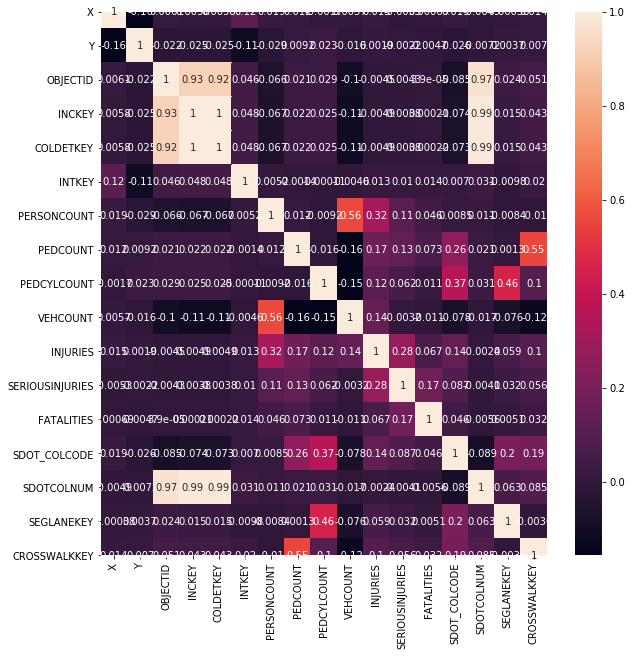

In [7]:
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrMatrix, annot=True, ax=ax)
plt.show()

## Data Cleaning

In [8]:
df.drop(["INCKEY","COLDETKEY"],axis=1,inplace=True)

In [9]:
df["UNDERINFL"].unique()

array(['N', nan, 'Y', '0', '1'], dtype=object)

For the column ```UNDERINFL``` there are 4 unique values. Intuitively, it seems that 'Y' and '1' denotes the same thing which is the person was under influence of alcohol. Same is with 'N' and '0'. Hence, let's save the column values in systematic format

In [10]:
def for_UNDERINFL(x):
    if x in ['Y','1']:
        return "Y"
    elif x in ['N','0']:
        return "N"
    else:
        return x
    
df["UNDERINFL"] = df["UNDERINFL"].apply(for_UNDERINFL)

In [11]:
temp = df[["SEVERITYCODE","SEVERITYDESC"]]
temp[~(temp.duplicated())].style.hide_index()

There are 5 categories of severity. It is safe to assume that the missing ```SEVERITYCODE``` must belong to unknown category i.e. Category 0.

In [12]:
df["SEVERITYCODE"].fillna('0', inplace=True)

In [13]:
df["ADDRTYPE"].fillna('Not Mentioned', inplace=True)

In [14]:
df["MONTH"] = df["INCDATE"].dt.month
df["YEAR"] = df["INCDATE"].dt.year

## Analysis

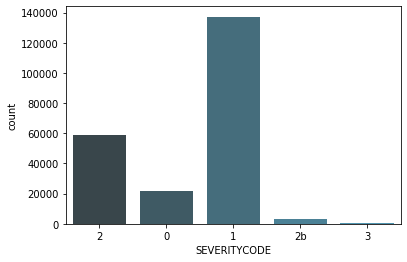

In [15]:
sns.countplot(df["SEVERITYCODE"])

In [16]:
df["SEVERITYCODE"].value_counts(normalize=True)*100

1     62.143054
2     26.526566
0     9.773827 
2b    1.398589 
3     0.157964 
Name: SEVERITYCODE, dtype: float64

We can see that 62% of accidents belong to Category 1 which is "Property Damage Only Collision" <br>
26% belong to Category 2, "Injury Collision"

### Year wise collision rate

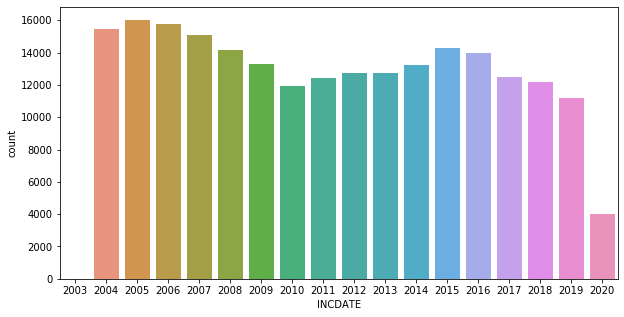

In [17]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df["INCDATE"].dt.year,ax=ax)

Accidents are seems to be in declining yearly, but we need some more data to state this precisely. 

### Month wise collision rate

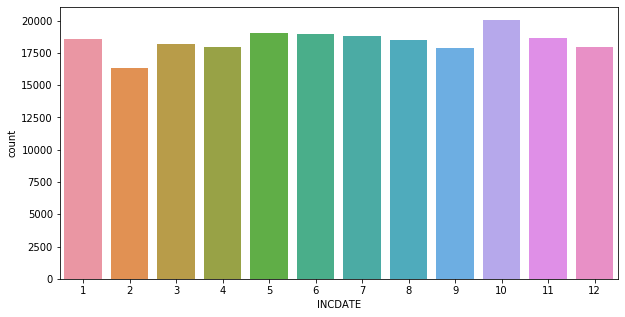

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df["INCDATE"].dt.month,ax=ax)

There is no clear trend in number of collisions and month of the year

In [19]:
df["INCTIME"] = pd.to_datetime(df["INCDTTM"])
for idx, dt in enumerate(df["INCDTTM"]):
    if ':' not in dt:
        df["INCTIME"][idx] = np.nan

b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
df["TIMEOFDAY"] = pd.cut(df["INCTIME"].dt.hour, bins=b, labels=l, include_lowest=True)

D:\Softwares\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [20]:
1 - (df["TIMEOFDAY"].isnull().sum() / len(df))

0.7631723070377529

We have time of accident for ~76% of data. In order to analyse timewise, splitting the data into 6 categories viz.  'Late Night', 'Early Morning', 'Morning', 'Noon', 'Eve', 'Night'

In [21]:
pd.DataFrame({'TIME' : ['00:00 to 04:00', '04:00 to 08:00', '08:00 to 12:00', '12:00 to 16:00', '16:00 to 20:00', '20:00 to 00:00']},
             index=['Late Night', 'Early Morning','Morning','Noon','Eve','Night'])

TIME
Late Night     00:00 to 04:00
Early Morning  04:00 to 08:00
Morning        08:00 to 12:00
Noon           12:00 to 16:00
Eve            16:00 to 20:00
Night          20:00 to 00:00

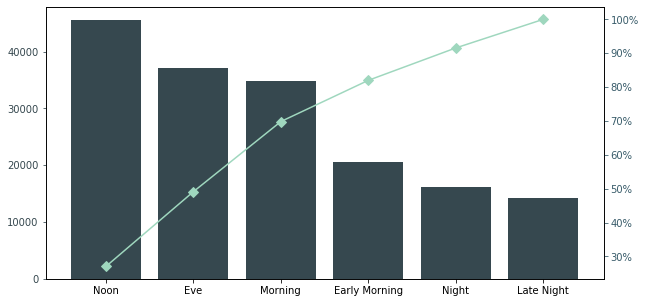

In [22]:
df_TOD = pd.DataFrame(df['OBJECTID'].groupby(df['TIMEOFDAY'].astype('object')).count())
df_TOD = df_TOD.sort_values(by='OBJECTID',ascending=False)
df_TOD["cumpercentage"] = df_TOD["OBJECTID"].cumsum()/df_TOD["OBJECTID"].sum()*100


fig, ax = plt.subplots(figsize=(10,5))
ax2 = ax.twinx()
ax.bar(df_TOD.index, df_TOD["OBJECTID"])
ax2.plot(df_TOD.index, df_TOD["cumpercentage"], color="C9", marker="D", ms=7)
ax2.yaxis.set_major_formatter(mpl.ticker.PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

From the pareto diagram, we can see that about 50% of accidents tend to happen during the day time i.e. between 12:00 P.M. to 8:00 P.M.

In [23]:
pd.DataFrame(df['OBJECTID'].groupby(df['TIMEOFDAY']).count())

OBJECTID
TIMEOFDAY              
Late Night     14237   
Early Morning  20519   
Morning        34919   
Noon           45599   
Eve            37215   
Night          16124

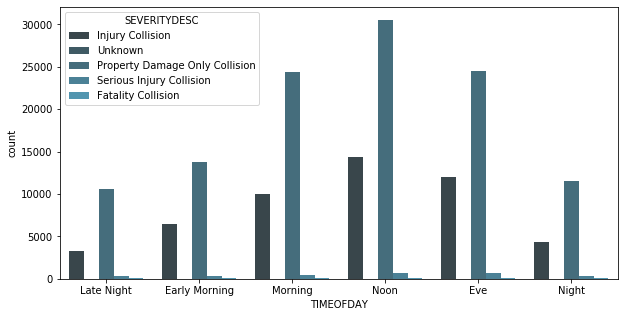

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df["TIMEOFDAY"], hue=df['SEVERITYDESC'],ax=ax)

In [25]:
pd.crosstab(df.TIMEOFDAY, df.SEVERITYCODE)

SEVERITYCODE   0      1      2   2b   3
TIMEOFDAY                              
Late Night     0  10639  3232   314  52
Early Morning  1  13748  6407   326  37
Morning        4  24403  10039  432  41
Noon           1  30534  14354  647  63
Eve            0  24509  11998  650  58
Night          0  11500  4295   288  41

In [26]:
pd.crosstab(df.TIMEOFDAY, df.SEVERITYCODE).apply(lambda r: r/r.sum(), axis=1)*100

SEVERITYCODE          0          1          2        2b         3
TIMEOFDAY                                                        
Late Night     0.000000  74.727822  22.701412  2.205521  0.365245
Early Morning  0.004874  67.001316  31.224719  1.588771  0.180321
Morning        0.011455  69.884590  28.749391  1.237149  0.117415
Noon           0.002193  66.961995  31.478760  1.418891  0.138161
Eve            0.000000  65.857853  32.239688  1.746608  0.155851
Night          0.000000  71.322253  26.637311  1.786157  0.254279

There is no clear relation between severity of accidents and time of the day. During Late Night, cases of severity 1 ("Property damage only collision") incidents are higher than rest of the day percentage wise.<br>
3 of 4 accidents happening during late night are just doing property damage

In [27]:
pd.crosstab(df.TIMEOFDAY, df.SEVERITYCODE).apply(lambda r: r/r.sum(), axis=0)*100

SEVERITYCODE           0          1          2         2b          3
TIMEOFDAY                                                           
Late Night     0.000000   9.224593   6.422255   11.817840  17.808219
Early Morning  16.666667  11.920266  12.731247  12.269477  12.671233
Morning        66.666667  21.158732  19.948336  16.258939  14.041096
Noon           16.666667  26.474643  28.522603  24.350772  21.575342
Eve            0.000000   21.250639  23.841033  24.463681  19.863014
Night          0.000000   9.971127   8.534526   10.839292  14.041096

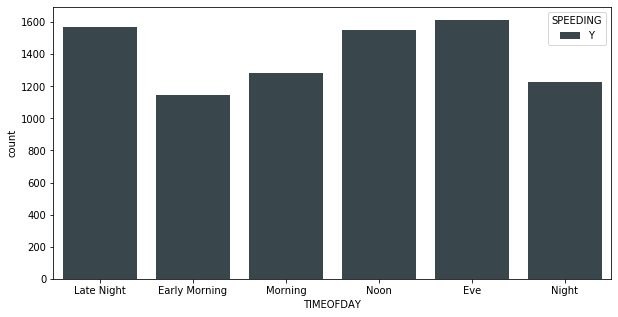

In [28]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df["TIMEOFDAY"], hue=df['SPEEDING'],ax=ax)

## Speeding

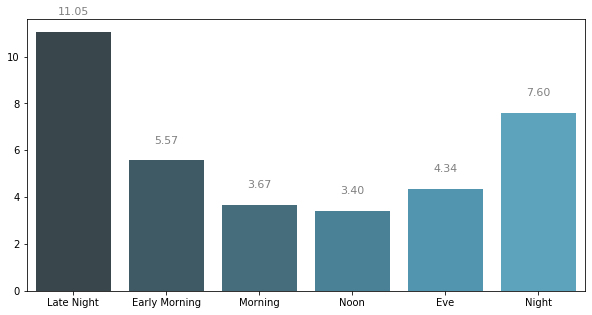

In [29]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(y=(df.groupby('TIMEOFDAY')['SPEEDING'].apply(lambda x: x[x == 'Y'].count()) /df.groupby('TIMEOFDAY')['OBJECTID'].count())*100, x=list(df.groupby('TIMEOFDAY').groups.keys()),ax=ax)
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')

11% of all cases in late night are due to speeding

## Collisions due to inattention

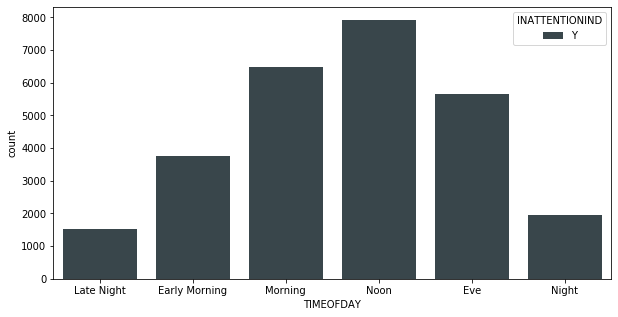

In [30]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df["TIMEOFDAY"], hue=df['INATTENTIONIND'],ax=ax)

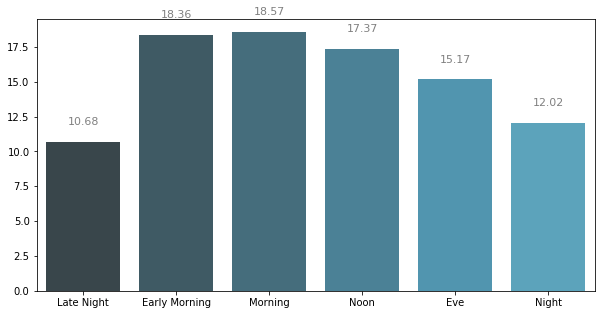

In [31]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(y=(df.groupby('TIMEOFDAY')['INATTENTIONIND'].apply(lambda x: x[x == 'Y'].count()) /df.groupby('TIMEOFDAY')['OBJECTID'].count())*100, x=list(df.groupby('TIMEOFDAY').groups.keys()),ax=ax)
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')

~18% of collisions happening in morning and early morning are due to inattention of drivers

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018DBB8B71C8>],
      dtype=object)

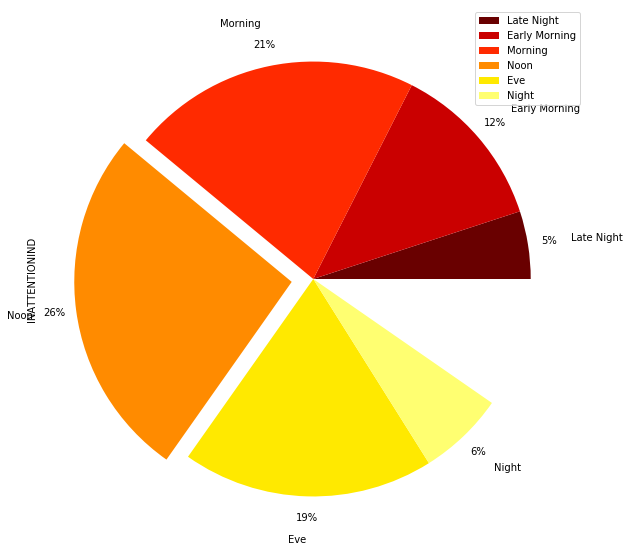

In [33]:
sns.set_palette(sns.color_palette("hot"))
pd.DataFrame((df.groupby('TIMEOFDAY')['INATTENTIONIND'].apply(lambda x: x[x == 'Y'].count())) / df[(df['INATTENTIONIND']=='Y')]['OBJECTID'].count() ).plot.pie(subplots=True, figsize=(10,10), autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, explode=(0, 0,0, 0.1, 0, 0))

## Under influence of alcohol 

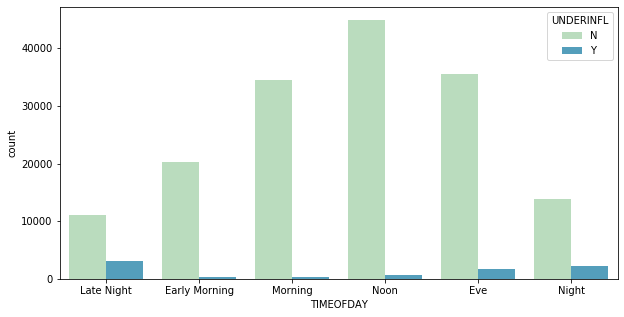

In [34]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set_palette(sns.color_palette("GnBu",2))
sns.countplot(df["TIMEOFDAY"], hue=df['UNDERINFL'],ax=ax)

In [35]:
pd.crosstab(df.TIMEOFDAY, df.UNDERINFL).apply(lambda x: (x/x.sum())*100, axis=0)

UNDERINFL              N          Y
TIMEOFDAY                          
Late Night     6.956093   36.961722
Early Morning  12.595477  4.007177 
Morning        21.563452  4.306220 
Noon           28.024687  8.241627 
Eve            22.186236  19.880383
Night          8.674055   26.602871

Of total alcoholic cases, ~64% cases happen during Night and Late Night

In [ ]:
### PLACE AND MONTH WISE

## Examining collision type

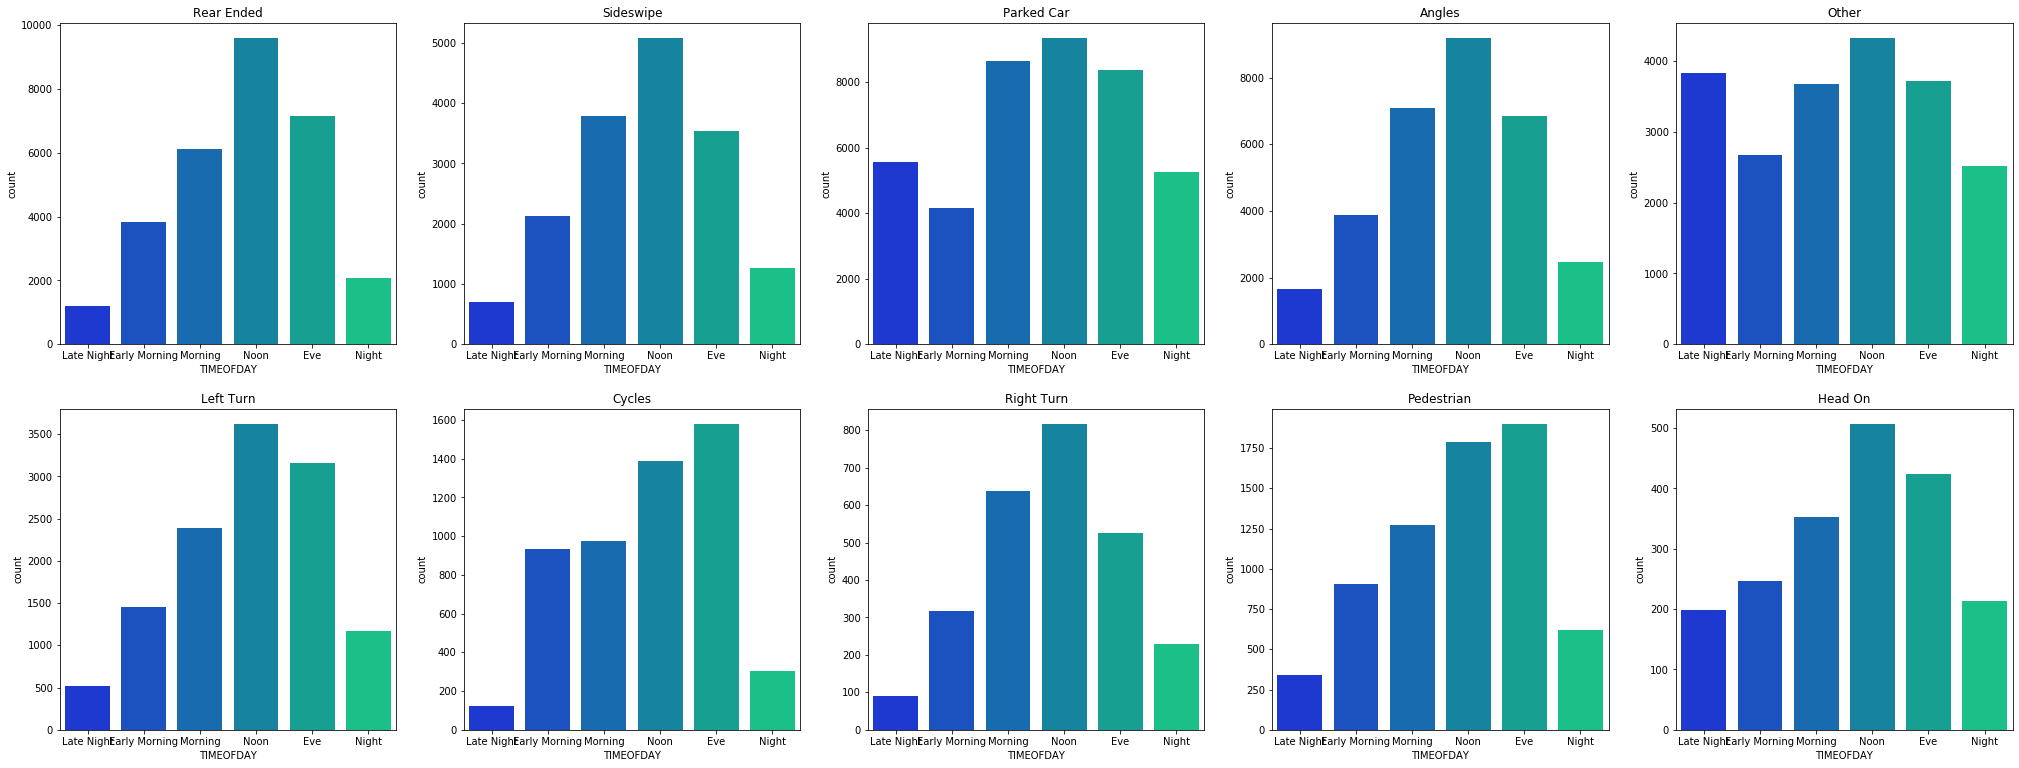

In [36]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(35,13))
sns.set_palette(sns.color_palette("winter"))
col_type = list(df['COLLISIONTYPE'].unique())
(col_type).remove(np.nan)

for i in range(0,2):
    for j in range(0,5):
        sns.countplot(df[df['COLLISIONTYPE'] == col_type[0]]['TIMEOFDAY'], ax=ax[i,j])
        ax[i,j].set_title(col_type[0])
        col_type.pop(0)

In [37]:
pd.crosstab(df.COLLISIONTYPE, df.TIMEOFDAY).apply(lambda r: (r/r.sum())*100, axis=0)

TIMEOFDAY      Late Night  Early Morning    Morning       Noon        Eve  \
COLLISIONTYPE                                                               
Angles         11.694880   18.938286      20.287032  20.135553  18.432226   
Cycles         0.877994    4.543239       2.792976   3.040074   4.245942    
Head On        1.397766    1.204056       1.011201   1.112062   1.139417    
Left Turn      3.610311    7.087842       6.854966   7.946744   8.502634    
Other          26.873639   13.030126      10.530236  9.471168   9.977964    
Parked Car     39.060195   20.249586      24.712825  20.460179  22.468559   
Pedestrian     2.395168    4.421371       3.646624   3.917440   5.105880    
Rear Ended     8.470886    18.636053      17.514108  20.997565  19.200795   
Right Turn     0.632156    1.550161       1.824744   1.792020   1.410835    
Sideswipe      4.987006    10.339280      10.825289  11.127196  9.515748    

TIMEOFDAY          Night  
COLLISIONTYPE             
Angles         15.387955  
Cycles         1.891707   
Head On        1.327296   
Left Turn      7.225702   
Other          15.592632  
Parked Car     32.531167  
Pedestrian     3.857843   
Rear Ended     12.882218  
Right Turn     1.420331   
Sideswipe      7.883148

People are morelikely to hit Parked car during Night. We can also see there are alot of "Other" collision type of cases in late night.

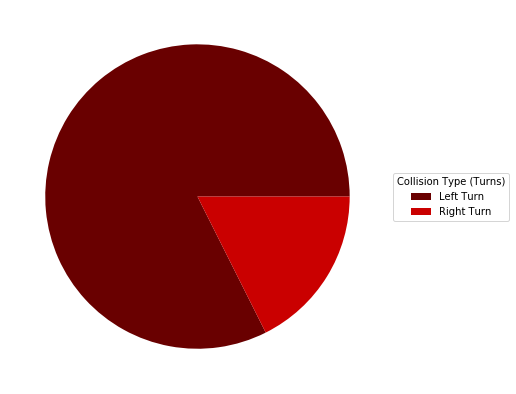

In [38]:
sns.set_palette(sns.color_palette("hot"))
tempdf = df[(df["COLLISIONTYPE"]=="Left Turn")|(df["COLLISIONTYPE"]=="Right Turn")]
fig, ax = plt.subplots(figsize=(7,7))
ax.pie(tempdf["COLLISIONTYPE"].value_counts(), textprops={'color':"white", 'fontsize': 14})
ax.legend(tempdf["COLLISIONTYPE"],
          title="Collision Type (Turns)",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [39]:
((df[df["COLLISIONTYPE"]=="Left Turn"]["OBJECTID"].count() - df[df["COLLISIONTYPE"]=="Right Turn"]["OBJECTID"].count()) / df[(df["COLLISIONTYPE"]=="Right Turn")|(df["COLLISIONTYPE"]=="Left Turn")]["OBJECTID"].count()) * 100

64.802997482583

There is ~65% more chance to encounter a collision while taking a Left turn than taking a Right turn

In [ ]:
sns.set_palette(sns.color_palette("Paired"))
x = pd.DataFrame(df[(df["COLLISIONTYPE"]=='Other')&(df["TIMEOFDAY"]=='Late Night')].groupby('SDOT_COLDESC')['OBJECTID'].count()).sort_values(by='OBJECTID', ascending=False)
y = pd.DataFrame(df[(df["COLLISIONTYPE"]=='Other')&(df['SDOT_COLDESC']=='MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT')].groupby("TIMEOFDAY")['OBJECTID'].count()).sort_values(by='OBJECTID', ascending=False)
z = pd.DataFrame(df[(df["COLLISIONTYPE"]=='Other')&(df['SDOT_COLCODE']==26)].groupby("TIMEOFDAY")['OBJECTID'].count()).sort_values(by='OBJECTID', ascending=False)
# z = pd.DataFrame(df[(df["COLLISIONTYPE"]=='Other')&(df["TIMEOFDAY"]=='Eve')].groupby('SDOT_COLDESC')['OBJECTID'].count()).sort_values(by='OBJECTID', ascending=False)

In [ ]:
others_values = x["OBJECTID"].tail(12).sum()
x.drop(x.tail(12).index,inplace=True)
x = x.append(pd.DataFrame(data={"OBJECTID":others_values}, index=["Others Remaining"]))

# others_values = y["OBJECTID"].tail(12).sum()
# y.drop(y.tail(12).index,inplace=True)
# y = y.append(pd.DataFrame(data={"OBJECTID":others_values}, index=["Others Remaing"]))

# others_values = z["OBJECTID"].tail(12).sum()
# z.drop(z.tail(12).index,inplace=True)
# z = z.append(pd.DataFrame(data={"OBJECTID":others_values}, index=["Others Remaing"]))

In [ ]:
plt.figure(0)
x.plot(kind='pie',subplots=True,figsize=(10,10),textprops={'color':"grey", 'fontsize': 14}, explode=(0.1,0.1,0,0,0,0))
#fig.set_facecolor('lightgrey')
#fig.patch.set_facecolor('white')
plt.figtext(.5,.9,"'Others' collision type distribution for 'Late Night'", fontsize=20, ha='center', color='white')
plt.axes().set_facecolor("white")
plt.axes().get_legend().remove()


# plt.figure(1)
# y.plot(kind='pie',subplots=True, figsize=(3,3), textprops={'color':"grey", 'fontsize': 9})
# fig.set_facecolor('lightgrey')
# fig.patch.set_facecolor('white')
# plt.axes().set_facecolor("white")
# plt.axes().get_legend().remove()
# plt.rcParams['font.size'] = 5.0

# plt.figure(2)
# z.plot(kind='pie',subplots=True,figsize=(3,3),textprops={'color':"grey", 'fontsize': 9})
# fig.set_facecolor('lightgrey')
# fig.patch.set_facecolor('white')
# plt.axes().set_facecolor("white")
# plt.axes().get_legend().remove()
# plt.rcParams['font.size'] = 5.0


plt.show()

Motor Vehicles tend to hit

In [ ]:
df1 = df.copy()

df1["COLLISIONTYPE"].fillna("Unknown",inplace=True)
df1["SDOT_COLDESC"].fillna("Unknown",inplace=True)
fig = px.sunburst(
    data_frame=df1[~df1["TIMEOFDAY"].isnull()],
    path= ["TIMEOFDAY",'COLLISIONTYPE',"SDOT_COLDESC"], 
    color="TIMEOFDAY",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    maxdepth=-1,                        
    branchvalues="total", 
    title="Breakdown of collision type by time",
)
fig.update_traces(textinfo='label+percent entry') # percent parent
fig.update_layout(margin=dict(t=30, b=10, r=10, l=10),
                  width=1000, height=1000)
fig.show()

In [ ]:
pd.crosstab(df.COLLISIONTYPE, df.TIMEOFDAY).apply(lambda r: (r/r.sum())*100, axis=1)

## Location wise analysis

In [ ]:
f_df = df.groupby('ADDRTYPE')[['FATALITIES']].sum()
f_df['INJURIES'] = df.groupby('ADDRTYPE')[['INJURIES']].sum()
f_df['SERIOUSINJURIES'] = df.groupby('ADDRTYPE')[['SERIOUSINJURIES']].sum()
f_df['ACDNTCOUNT'] = df.groupby('ADDRTYPE')[['OBJECTID']].count()
f_df = f_df.reset_index()
f_df

In [ ]:
sns.set_palette('twilight_shifted_r')
a = df.groupby('ADDRTYPE')[['FATALITIES']].sum()
f_df1 = a.apply(lambda x : 100 * x/float(x.sum()))
a['P_INJURIES'] = df.groupby('ADDRTYPE')[['INJURIES']].sum()
f_df1 = a.apply(lambda x : 100 * x/float(x.sum()))
a['P_SERIOUSINJURIES'] = df.groupby('ADDRTYPE')[['SERIOUSINJURIES']].sum()
f_df1 = a.apply(lambda x : 100 * x/float(x.sum()))
a['P_ACDNTCOUNT'] = df.groupby('ADDRTYPE')[['OBJECTID']].sum()
f_df1 = a.apply(lambda x : 100 * x/float(x.sum()))
#f_df1 = f_df1.drop(columns=['FATALITIES', 'INJURIES'])
f_df1.reset_index(inplace=True)
f_df1.rename(columns={'FATALITIES':'P_FATALITIES'}, inplace=True)
f_df1

df2=pd.melt(f_df1,id_vars=['ADDRTYPE'],var_name='DESC', value_name='PERCENTAGE OF TOTAL')
df2
sns.barplot(x='ADDRTYPE', y='PERCENTAGE OF TOTAL', hue='DESC', data=df2)
plt.xticks(rotation=90)

In [ ]:
layout = go.Layout(
    title="Location wise Type of Injuries",
   # plot_bgcolor="black",
    xaxis=dict(
        title="ACCIDENT ADDRES TYPE",
        linecolor='#A9A9A9',
        showgrid=True),
    yaxis=dict(
        title="NUMBER OF ACCIDENTS",
        showgrid=False),
    barmode='group'
)

fig = go.Figure(data=[
    go.Bar(name='TOTAL #OF ACCIDENT', x=f_df['ADDRTYPE'], y=f_df['ACDNTCOUNT']),
    go.Bar(name='INJURIES', x=f_df['ADDRTYPE'], y=f_df['INJURIES']),
    go.Bar(name='SERIOUSINJURIES', x=f_df['ADDRTYPE'], y=f_df['SERIOUSINJURIES']),
    go.Bar(name='FATALITIES', x=f_df['ADDRTYPE'], y=f_df['FATALITIES'])
    
], layout= layout)
# Change the bar mode

#fig.update_layout(layout= layout)
fig.show()

In [ ]:
pd.crosstab(df["COLLISIONTYPE"],df["ADDRTYPE"])

In [ ]:
df1 = df[df['INCDATE'].dt.year > 2016]
a= df1.groupby(['INTKEY','LOCATION'])['OBJECTID'].count() #,
a = a.to_frame()
a.reset_index(inplace=True)
a.rename(columns={'OBJECTID':'# OF ACCIDENTS'}, inplace=True)
bins = [0, 10, 20, 30, 40,50,120]
labels = ['Below 10', 'Between 10 and 20','Between 20 and 30','Between 30 and 40','Between 40 and 50',
         'Above 50']
a['BINNED'] = pd.cut(a['# OF ACCIDENTS'], bins, labels=labels)
a = a.sort_values(by=['# OF ACCIDENTS'],ascending=False)
b = a.head(20)
fig = px.bar(b, x="# OF ACCIDENTS", y="LOCATION", color="# OF ACCIDENTS")
fig.show()

In [ ]:
a = df[df['YEAR']!=2020].groupby(['MONTH'])['OBJECTID'].count()/df[df['YEAR']!=2020].groupby(['MONTH']).size().nunique()
a = a.to_frame()
a.reset_index(inplace=True)
a.rename(columns = {'OBJECTID':'2013-2019'}, inplace=True)
b= df[df['YEAR']==2020].groupby(['MONTH'])['OBJECTID'].count()
b = b.to_frame()
b.reset_index(inplace=True)
b.rename(columns = {'OBJECTID':'2020'}, inplace=True)
# merging dataframes
df_compare = pd.merge(a, b, on='MONTH', how='left')
df_compare


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_compare['MONTH'], y=df_compare['2013-2019'],mode='lines+markers', 
                         name='Before 2020'))
fig.add_trace(go.Scatter(x=df_compare['MONTH'], y=df_compare['2020'],mode='lines+markers',
                        name='2020'))
fig.update_layout(title="Impact of COVID-19 on Road Accidents",
                  xaxis_title='Month',
                  yaxis_title='Average Number of Accidents'
                 )
fig.show()

In [ ]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(10,8))
sns.countplot(y=df['ROADCOND'], ax=ax[0],orient="h")
sns.countplot(y=df['LIGHTCOND'], ax=ax[1],orient="h")

In [ ]:
fig, ax = plt.subplots(nrows=2,ncols=4,figsize=(20,10))
ax[0,0].pie(df[(df["SEVERITYCODE"]=="1")]["ROADCOND"].value_counts(), textprops={'color':"white", 'fontsize': 14})
ax[0,1].pie(df[(df["SEVERITYCODE"]=="2")]["ROADCOND"].value_counts(), textprops={'color':"white", 'fontsize': 14})
ax[0,2].pie(df[(df["SEVERITYCODE"]=="2b")]["ROADCOND"].value_counts(), textprops={'color':"white", 'fontsize': 14})
ax[0,3].pie(df[(df["SEVERITYCODE"]=="3")]["ROADCOND"].value_counts(), textprops={'color':"white", 'fontsize': 14})

ax[0,0].set_title("Severity code = 1",color="grey")
ax[0,1].set_title("Severity code = 2",color="grey")
ax[0,2].set_title("Severity code = 2b",color="grey")
ax[0,3].set_title("Severity code = 3",color="grey")


ax[1,0].pie(df[(df["SEVERITYCODE"]=="1")]["LIGHTCOND"].value_counts(), textprops={'color':"white", 'fontsize': 14})
ax[1,1].pie(df[(df["SEVERITYCODE"]=="2")]["LIGHTCOND"].value_counts(), textprops={'color':"white", 'fontsize': 14})
ax[1,2].pie(df[(df["SEVERITYCODE"]=="2b")]["LIGHTCOND"].value_counts(), textprops={'color':"white", 'fontsize': 14})
ax[1,3].pie(df[(df["SEVERITYCODE"]=="3")]["LIGHTCOND"].value_counts(), textprops={'color':"white", 'fontsize': 14})


ax[0,3].legend(df["ROADCOND"],
          title="Road Condition",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax[1,3].legend(df["LIGHTCOND"],
          title="Road Condition",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [ ]:
df["UNDERINFL"].fillna("Unknown",inplace=True)
df['COPYOFTIME'] = df["TIMEOFDAY"].copy()
df['COPYOFTIME'] = df['COPYOFTIME'].astype('object')
df['COPYOFTIME']= df['COPYOFTIME'].fillna('Time Not Known')

In [ ]:
#['Region',"Segment",'Ship Mode']
fig = px.sunburst(
    data_frame=df,
    path= ['UNDERINFL','COPYOFTIME'], # ,'ADDRTYPE', 'SEVERITYDESC','COLLISIONTYPE' # ,, # Root, branches, leaves
    color='UNDERINFL',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    maxdepth=-1,                        # set the sectors rendered. -1 will render all levels in the hierarchy
    # color="Victim's age",
    # color_continuous_scale=px.colors.sequential.BuGn,
    # range_color=[10,100],
    branchvalues="total", # total               # or 'remainder'
    # hover_name="Unarmed",
    # # hover_data={'Unarmed': False},    # remove column name from tooltip  (Plotly version >= 4.8.0)
    title="Breakdown of Accidents by Location and Type",
    # template='ggplot2',               # 'ggplot2', 'seaborn', 'simple_white', 'plotly',
    #                                   # 'plotly_white', 'plotly_dark', 'presentation',
    #                                   # 'xgridoff', 'ygridoff', 'gridon', 'none'
)
fig.update_traces(textinfo='label+percent entry') # percent parent
fig.update_layout(margin=dict(t=30, b=10, r=10, l=10))
fig.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(y=df['SDOT_COLDESC'],ax=ax,orient="h")

In [ ]:
df['SDOT_COLDESC'].value_counts(normalize=True)

In [ ]:
df['INJURIES'].groupby(df['SEVERITYCODE']).sum()

In [ ]:
df["PERSONCOUNT"].groupby(df["ADDRTYPE"]).sum()

In [ ]:
sns.countplot(df["ADDRTYPE"])

In [ ]:
df["ADDRTYPE"].value_counts().plot.bar(stacked=True)

In [ ]:
sf_geo = r'san-francisco.geojson'
sf_map = folium.Map(location=[df["Y"].mean(), df["X"].mean()],  zoom_start=12, control_scale=True, min_zoom=11)

df_filtered = df[(df["INCDATE"].dt.year == 2018)]
HeatMap(data=df_filtered[["X","Y","VEHCOUNT"]].groupby(['Y', 'X']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(sf_map)

sf_map

In [ ]:
sf_map.save("test.html")

In [ ]:
df = df_temp

In [ ]:
df.dropna(subset=["Y","X"], inplace=True)
df_filtered_1 = df[df["INCDATE"].dt.year>2018]
#f = 'map_station_cluster.html'
#map.save(f)

In [ ]:
def color_change(c):
    if(c < 15):
        return('red')
    elif(15 <= c < 30):
        return('orange')
    else:
        return('green')
# Create base map
seattle = [df_filtered_1['Y'].mean(), df_filtered_1['X'].mean()]
map1 = folium.Map(location = seattle,
                 zoom_start = 12, 
                 tiles = "CartoDB positron")
marker_cluster = MarkerCluster(locations=[df_filtered_1['Y'], df_filtered_1['X']]).add_to(map1)

In [ ]:
# Plot markers
for _lat, _lon, _cap, _name in zip(df_filtered_1['Y'], df_filtered_1['X'], df_filtered_1['VEHCOUNT'], df_filtered_1["REPORTNO"]):
    folium.CircleMarker(location = [_lat, _lon], 
                        radius = 9, 
                        popup = _name, 
                        fill_color = color_change(_cap), 
                        color = "gray", 
                        fill_opacity = 0.9).add_to(marker_cluster)

map1

In [ ]:
f = 'map_station_cluster.html'
map1.save(f)

In [ ]:
Times = df["TIMEOFDAY"].unique()
val = {}
for i in Times:
    t = (df[(df['INATTENTIONIND']=="Y")&(df["TIMEOFDAY"]==i)]["OBJECTID"].count() / df[(df["TIMEOFDAY"]==i)]["OBJECTID"].count())*100
    val[i]='%.2f'%t
    
sns.barplot(x=list(val.keys()), y=np.array(list(val.values())).astype('float'))